## Task 1

In [55]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
imgs = olivetti.images
labels = olivetti.target
X = imgs.reshape((400, 4096)).transpose()

np.random.seed(42)

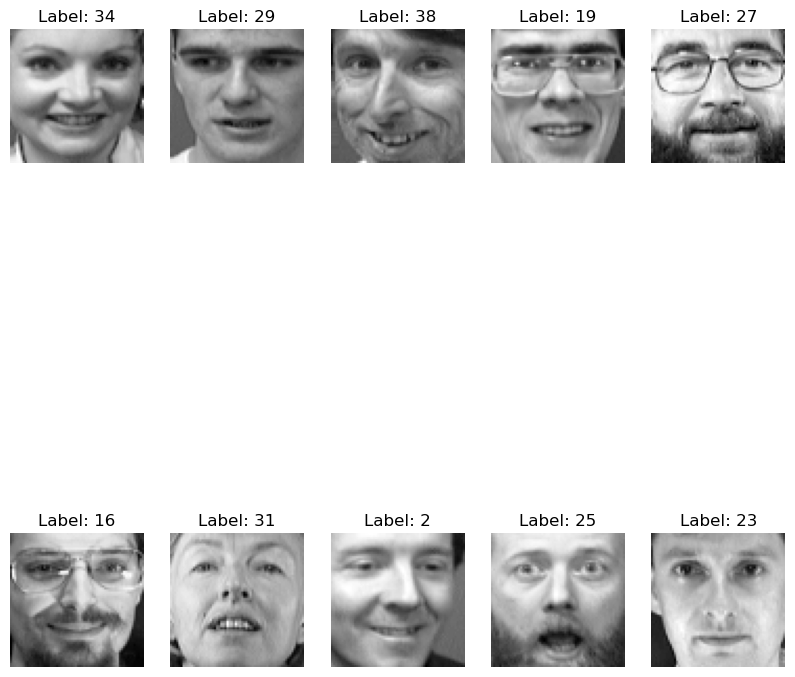

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# Visualize 10 randomly selected pictures with the corresponding labels
fig, axs = plt.subplots(2, 5, figsize=(10, 12))
axs = axs.flatten()
for i in range(10):
    index = np.random.randint(0, 400)
    # Correctly reshape each vectorized image to 64x64 for display
    axs[i].imshow(X[:, index].reshape((64, 64)), cmap="gray")
    axs[i].set_title("Label: {}".format(labels[index]))
    axs[i].axis("off")
plt.show()

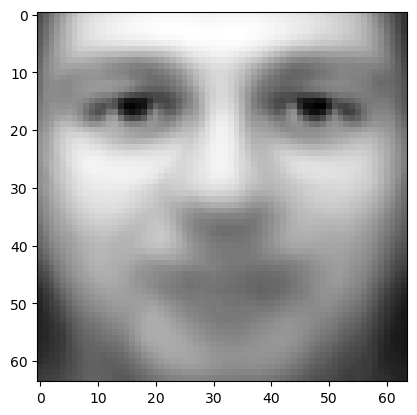

In [59]:
X_mean = np.mean(X, axis=1)
plt.imshow(np.reshape(X_mean, (64, 64)), cmap="gray")

In [53]:
X_centered = X - X_mean[:, np.newaxis]

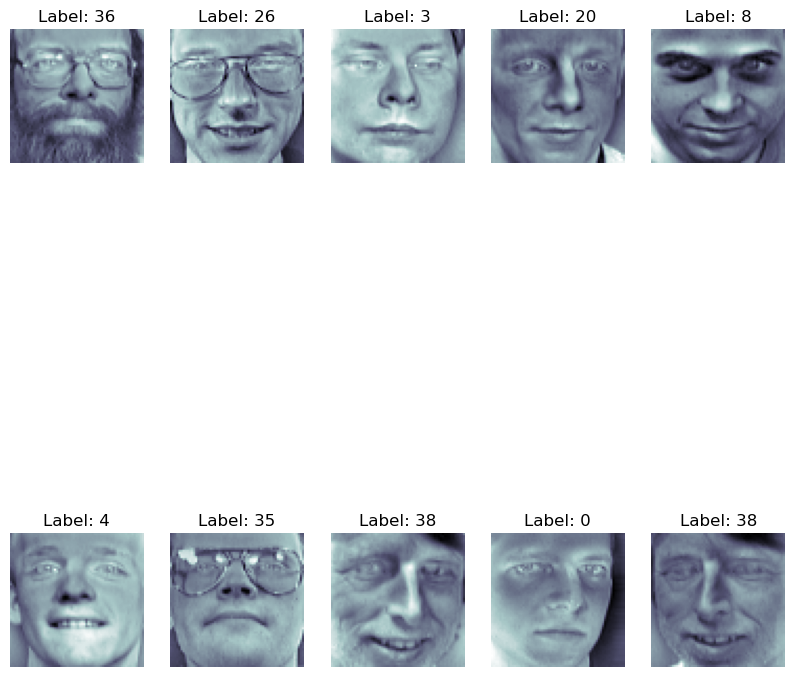

In [64]:
# Visualize 10 randomly selected pictures with the corresponding labels
fig, axs = plt.subplots(2, 5, figsize=(10, 12))
axs = axs.flatten()
for i in range(10):
    index = np.random.randint(0, 400)
    # Correctly reshape each vectorized image to 64x64 for display
    axs[i].imshow(X_centered[:, index].reshape(64, 64), cmap=plt.cm.bone)
    axs[i].set_title("Label: {}".format(labels[index]))
    axs[i].axis("off")
plt.show()

In [10]:
# Perform SVD by first setting the attribute full_matrices = True and then full_matrices = False. Comment the results
print("full_matrices = True")
U, s, V = np.linalg.svd(X_centered, full_matrices=True)
print("U shape:", U.shape)
print("s shape:", s.shape)
print("V shape:", V.shape)

print("full_matrices = False")
U, s, V = np.linalg.svd(X_centered, full_matrices=False)
print("U shape:", U.shape)
print("s shape:", s.shape)
print("V shape:", V.shape)

full_matrices = True
U shape: (4096, 4096)
s shape: (400,)
V shape: (400, 400)
full_matrices = False
U shape: (4096, 400)
s shape: (400,)
V shape: (400, 400)


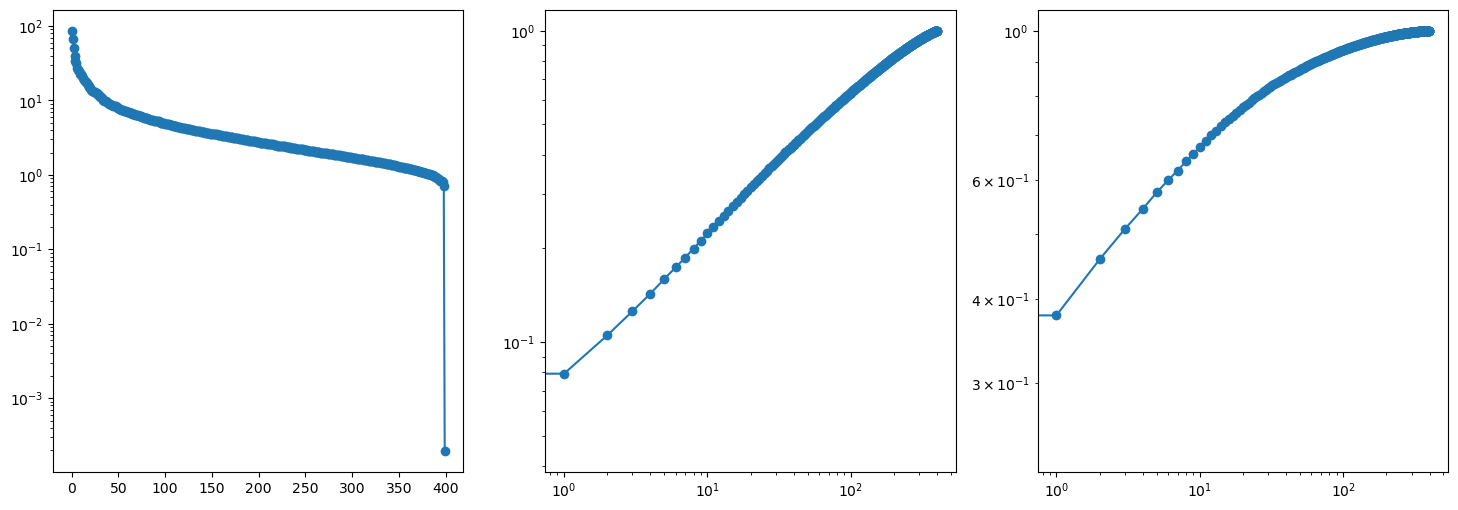

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].semilogy(s, "o-")
axs[1].loglog(np.cumsum(s) / np.sum(s), "o-")
axs[2].loglog(np.cumsum(s**2) / np.sum(s**2), "o-")  #explained variance

In [12]:
def randomized_SVD(A, k):
    np.random.seed(42)
    m, n = A.shape
    omega = np.random.rand(n, k)
    Y = A @ omega
    Q, R = np.linalg.qr(Y)
    B = Q.T @ A
    rU, rs, rVT = np.linalg.svd(B, full_matrices=False)
    rU = Q @ rU
    return rU, rs, rVT

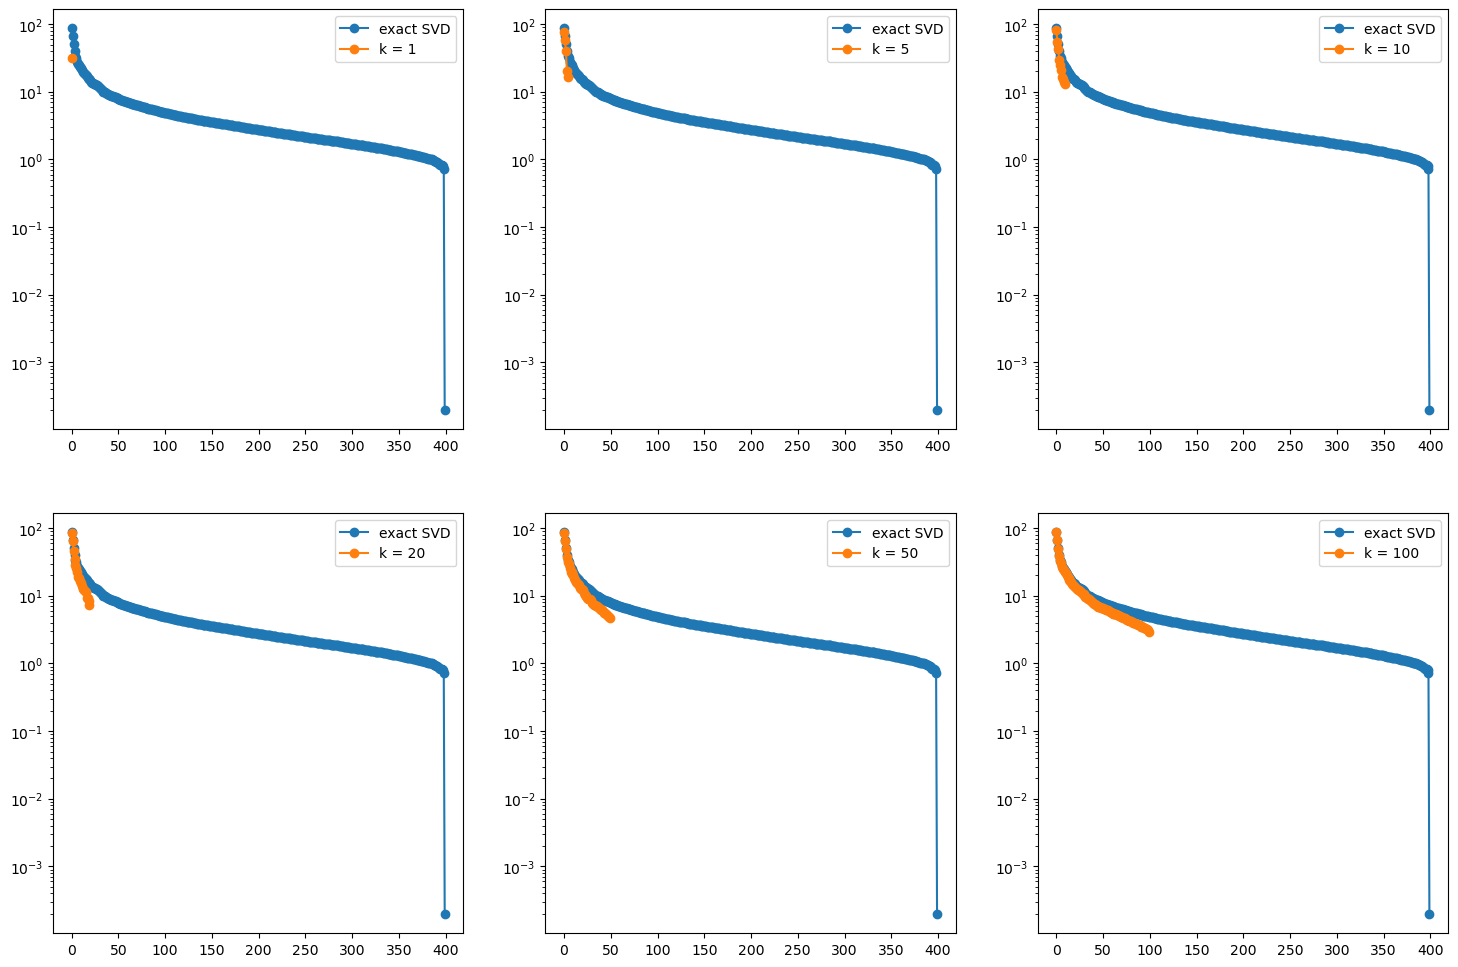

In [98]:
k_values = [1, 5, 10, 20, 50, 100]

randomized_SVD_history = []

for k in k_values:
    _, randomized_s, _ = randomized_SVD(X_centered, k)
    randomized_SVD_history.append(randomized_s)

fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs = axs.flatten()

i = 0
for rs in randomized_SVD_history:
    axs[i].plot(s, "o-", label="exact SVD")
    axs[i].semilogy(rs, "o-", label="k = {}".format(k_values[i]))
    axs[i].legend()
    i += 1

In [13]:
U, s, V = np.linalg.svd(X_centered, full_matrices=False)

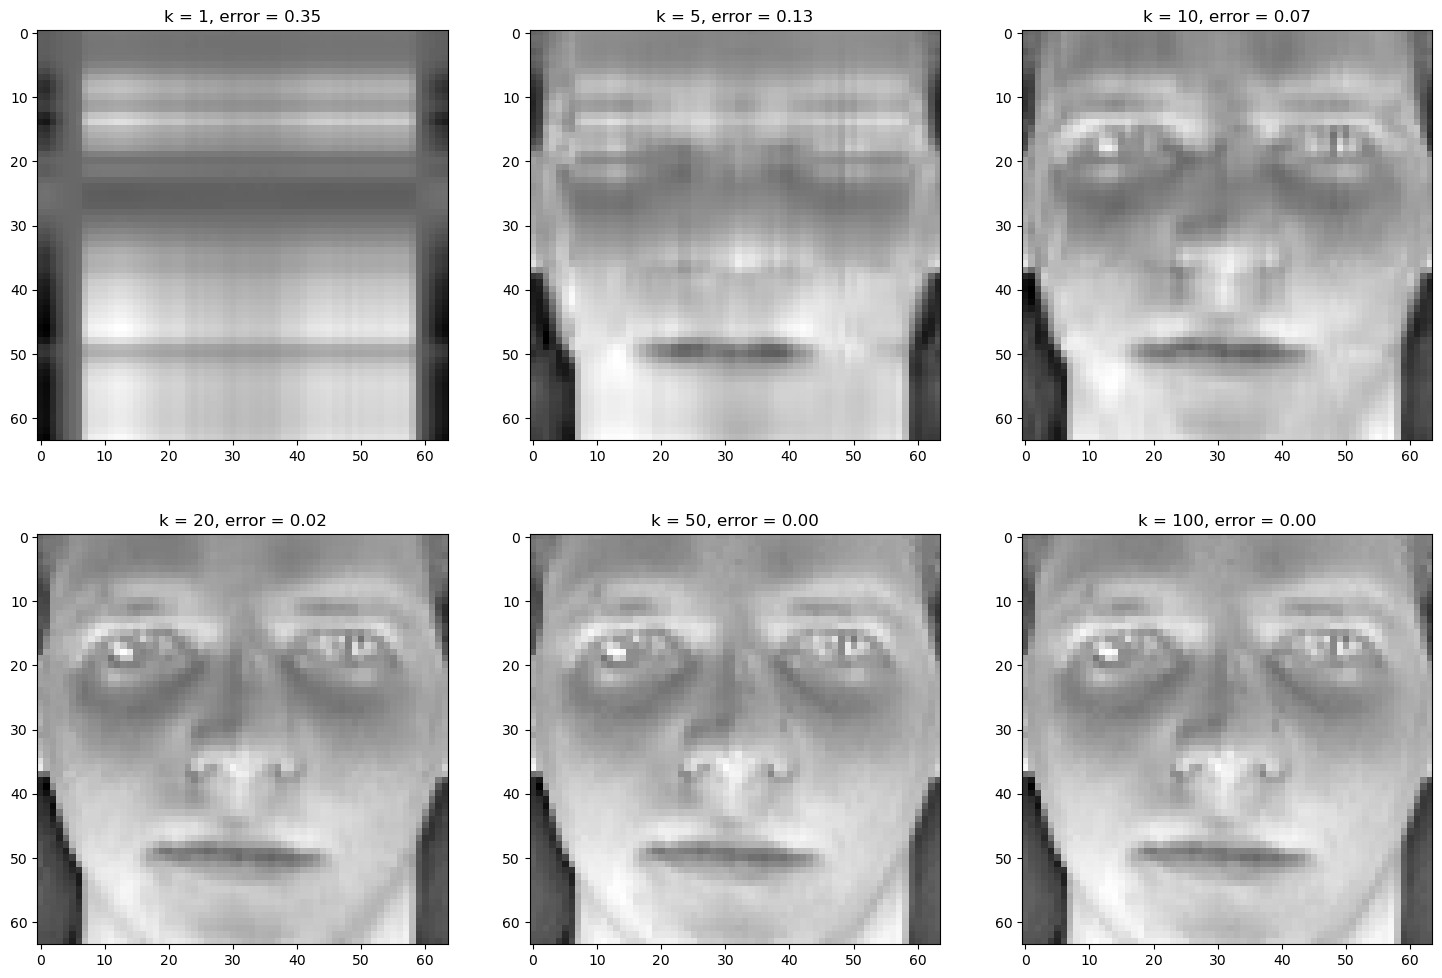

In [75]:
k_values = [1, 5, 10, 20, 50, 100]
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
axs = axs.flatten()
image_matrix = X_centered[:, 0].reshape(64, 64)
U, s, VT = np.linalg.svd(image_matrix, full_matrices=False)

def reconstruction_error_exact(A, k):
    U, s, VT = np.linalg.svd(A, full_matrices=False)
    Ak = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    return np.linalg.norm(A - Ak, ord=2) / np.linalg.norm(A, ord=2)

i = 0
error_list = []
for k in k_values:
    A_k = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    error_list.append(reconstruction_error_exact(image_matrix, k))
    axs[i].imshow(A_k, cmap="gray")
    axs[i].set_title("k = {}, error = {:.2f}".format(k, error_list[i]))
    i += 1

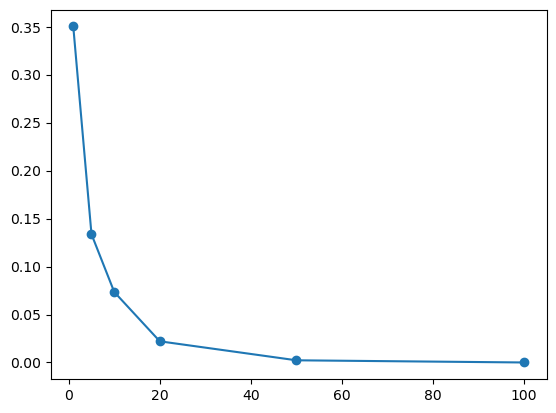

In [76]:
plt.plot(k_values, error_list, "o-")

In [80]:
U, s, V = np.linalg.svd(X_centered, full_matrices=False)

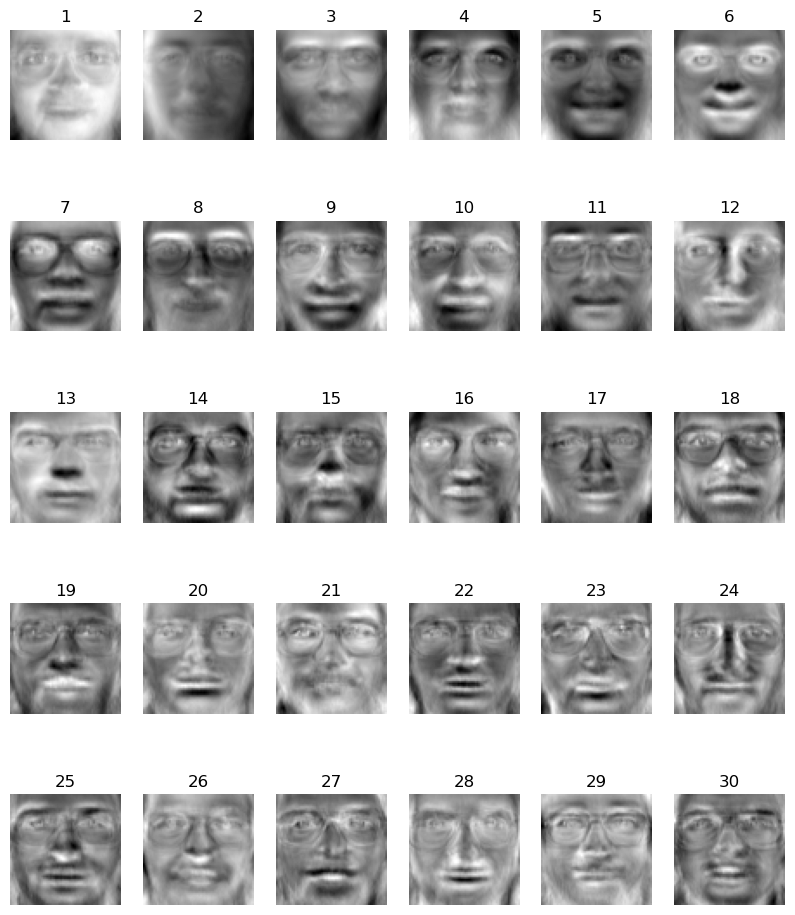

In [22]:
fig, axs = plt.subplots(5, 6, figsize=(10, 12))
axs = axs.flatten()
for i in range(30):
    axs[i].imshow(np.reshape(U[:, i], (64, 64)), cmap="gray")
    axs[i].axis("off")
    axs[i].set_title(i + 1)

In [41]:
# Compute the first two principal components related to the subset of images corresponding to labels = 0, 39
X0 = X[:, labels == 0]
X39 = X[:, labels == 39]

X0_mean = np.mean(X0, axis=1)
X39_mean = np.mean(X39, axis=1)

X0_centered = X0 - X0_mean[:, np.newaxis]
X39_centered = X39 - X39_mean[:, np.newaxis]

U0, s0, V0 = np.linalg.svd(X0_centered, full_matrices=False)
U39, s39, V39 = np.linalg.svd(X39_centered, full_matrices=False)

print("Label 0	")
print(np.inner(X0[:, 0] - X0_mean, U0[:, 0]))
print(np.inner(X0[:, 0] - X0_mean, U0[:, 1]))

print("Label 39	")
print(np.inner(X39[:, 0] - X39_mean, U39[:, 0]))
print(np.inner(X39[:, 0] - X39_mean, U39[:, 1]))



Label 0	
0.22209373
-4.2617455
Label 39	
-6.1436534
-0.5601169


In [82]:
Phi0 = U0.transpose() @ (X0 - X0_mean[:, np.newaxis])
Phi39 = U39.transpose() @ (X39 - X39_mean[:, np.newaxis])

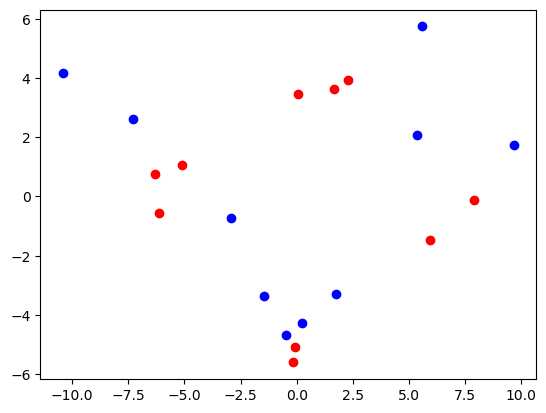

In [97]:
# Create a scatterplot for the first 2 principal components of the subset of images grouped by label. Comment what you see.
for i in range(10):
    plt.scatter(Phi0[0, i], Phi0[1, i], c="blue", label="Label 0")
    plt.scatter(Phi39[0, i], Phi39[1, i], c="red", label="Label 39")

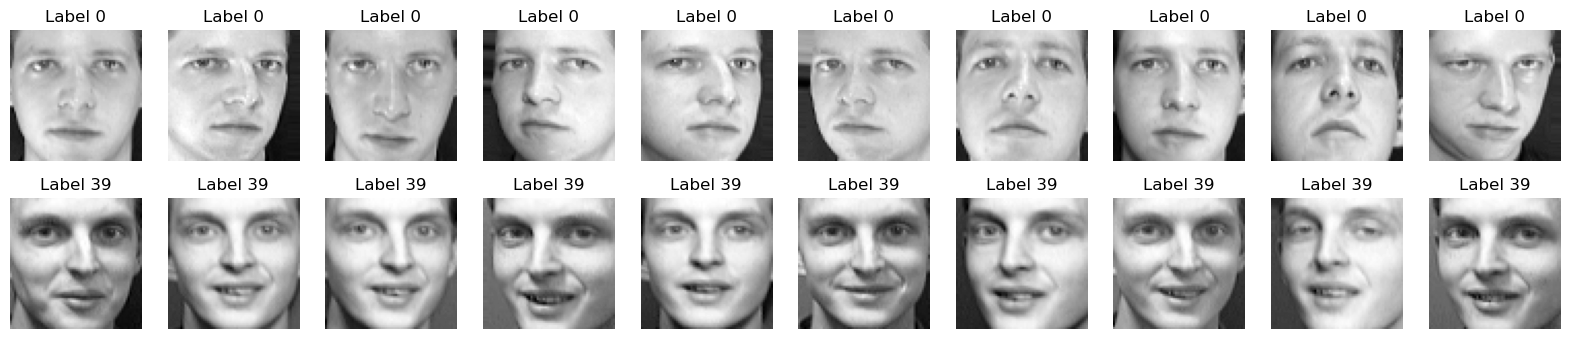

In [77]:
fig, axs = plt.subplots(2, 10, figsize=(20, 4))
axs = axs.flatten()

for i in range(10):
    axs[i].imshow(X0[:, i].reshape(64, 64), cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("Label 0")

for i in range(10):
    axs[i + 10].imshow(X39[:, i].reshape(64, 64), cmap="gray")
    axs[i + 10].axis("off")
    axs[i + 10].set_title("Label 39")



## Task2

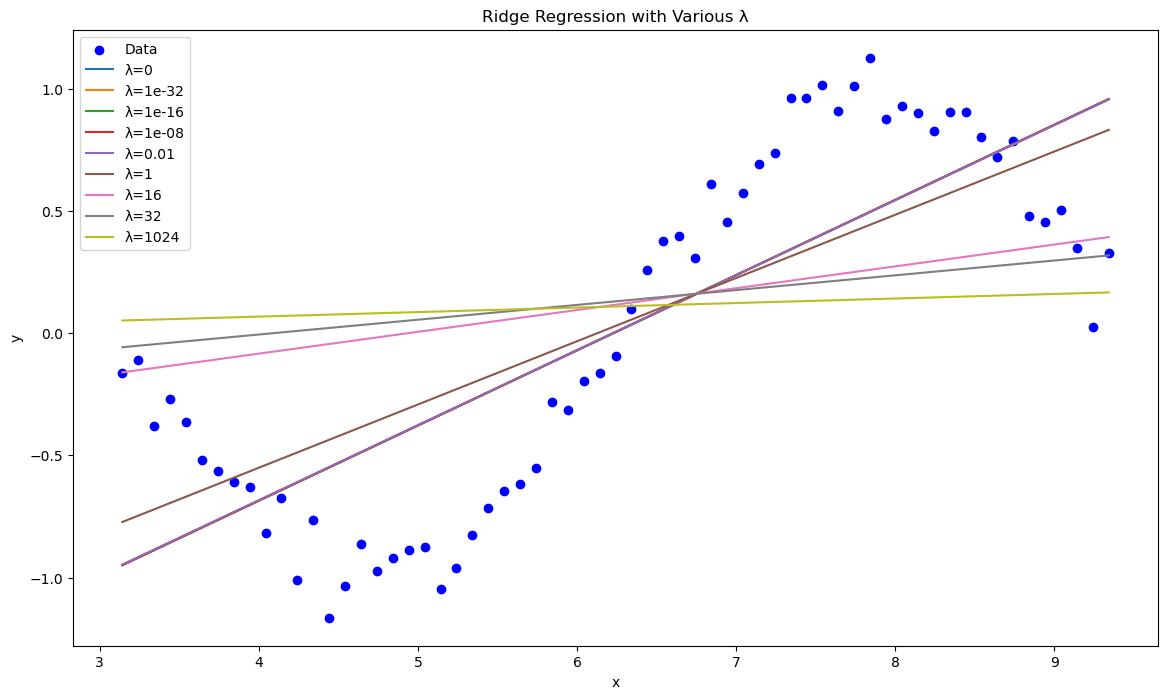

In [47]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(55)
x = np.arange(np.pi, 3 * np.pi, 0.1)
y = np.sin(x) + np.random.normal(0, 0.1, len(x))


#Ridge regression function
def ridge_regression(x, y, lmbda):
    X = np.vstack([np.ones(len(x)), x]).T
    w_star = (np.linalg.inv(X.T @ X + lmbda * np.eye(X.shape[1])) @ X.T @ y)  # w Ridge regression solution
    return w_star


# Lambda values
lambdas = [0, 1e-32, 1e-16, 1e-8, 1e-2, 1, 16, 32, 1024]

plt.figure(figsize=(14, 8))
plt.scatter(x, y, color="blue", label="Data")

for lmbda in lambdas:
    w_star = ridge_regression(x, y, lmbda)
    plt.plot(x, w_star[0] + w_star[1] * x, label=f"λ={lmbda}")

# Labels and legend
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ridge Regression with Various λ")
plt.legend()
plt.show()